# Scalabilité - Projet: Twitter Sentiment Analysis

In [1]:
#Path pour les fichiers
file_path_data = 'data/data_clean/'
file_path_data_scalability = 'data_scalability/movie_reviews/'
trained_model_path = 'models_training/Best_models_A/'

# I. Importation des packages nécessaires et des jeux de données

# 1. Importation des packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re 
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk import word_tokenize, pos_tag, sent_tokenize 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import linear_model
import pickle
from sklearn.metrics import classification_report

# 2. Importation du jeu de données: Tweets

In [3]:
df = pd.read_csv(file_path_data+'data_clean.csv', index_col = 0)

On affiche ici les informations sur le dataframe df

In [197]:
print("Le nombre de tweets positifs est:", (df[df.target == 4].shape[0]))
print("Le nombre de tweets négatif est:", (df[df.target == 0].shape[0]))
print("Le nombre de valeurs manquante:\n" + str(pd.isnull(df).sum()))

Le nombre de tweets positifs est: 99968
Le nombre de tweets négatif est: 99977
Le nombre de valeurs manquante:
target                   0
ids                      0
date                     0
flag                     0
user                     0
text                     0
clean_text               0
clean_text_tagged        0
clean_text_tagged_bis    0
dtype: int64


In [198]:
X = df['text']
y = df.target

In [199]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state = 0)

In [200]:
vectorizer = pickle.load(open(trained_model_path+'vectorizer.sav', 'rb'))
X_test = vectorizer.transform(X_test)

# 3. Importation du jeu de données: Movie reviews

In [4]:
mov = pd.read_csv(file_path_data_scalability+'dataset.csv',encoding = "ISO-8859-1")

In [5]:
mov.rename(columns={"Sentiment": "target", "SentimentText": "text"}, inplace=True)
mov['target'] = mov['target'].replace([1],[4])

In [203]:
mov.head()

,text,target
0,"first think another Disney movie, might good, ...",4
1,"Put aside Dr. House repeat missed, Desperate H...",0
2,"big fan Stephen King's work, film made even gr...",4
3,watched horrid thing TV. Needless say one movi...,0
4,truly enjoyed film. acting terrific plot. Jeff...,4


In [7]:
mov.to_csv('data_scalability/movie_reviews/movie_reviews.csv')#, index =None, header = True) 

On récupère ici les informations sur le jeu de données Movies: 

In [204]:
print("Le nombre de commentaires positifs est:", (mov[mov.target == 4].shape[0]))
print("Le nombre de commentaires négatifs est:", (mov[mov.target == 0].shape[0]))
print("Le nombre de valeurs manquante:\n" + str(pd.isnull(mov).sum()))

Le nombre de commentaires positifs est: 12500
Le nombre de commentaires négatifs est: 12500
Le nombre de valeurs manquante:
text      0
target    0
dtype: int64


**Commentaire:** 
    - Notre jeu de données est bien équilibré entre les commentaires positifs et négatifs.
    - Notre jeu de données ne comporte pas de valeurs manquantes.

In [205]:
X_mov = mov['text']
y_mov = mov.target
X_mov = vectorizer.transform(X_mov)

# II. Application des modèles entrainés

In [216]:
models_name = ['Logistic', 'Naif bayésien BernoulliNB', 'Naif bayésien MultinomialNB', 'KNeighbors', 'Decision Tree',
              'Random Forest', 'XGBoost', 'GradientBoosting', 'AdaBoost']
trained_models = ['logreg','ber','nb','knn','dc','rf','xgb','gradbt','ac' ]

In [217]:
def test(models_name, trained_models, X_test, y_test, s = 'tweets'):
    prediction = dict()
    for i in range(len(models_name)):
        model = pickle.load(open(trained_model_path+trained_models[i]+'.sav', 'rb'))     
        prediction[models_name[i] + '_' + s ] = model.predict(X_test) #save the prediction to dictionary
        print("\n"+"="*40+models_name[i]+"="*40+"\n")
        print("Evaluation détaillée de la Classification par " + models_name[i] +":\n \n", classification_report(y_test,prediction[models_name[i] + '_' + s]))
        confusion_matrix = pd.crosstab(y_test, prediction[models_name[i] + '_' + s], rownames=['Classe réelle'],colnames=['Classe prédite'])
        print("La matrice de confusion pour la Classification par " + models_name[i] +" :\n \n" ,confusion_matrix)
        accuracy = model.score(X_test, y_test)
        print("Le score pour la Classification par " + models_name[i] + ": ",accuracy)
    return prediction

# 1. Avec le jeu de données Tweets

In [218]:
prediction_tweets = test(models_name, trained_models, X_test, y_test, s = 'tweets') # It takes about 5 mins


========================================Logistic========================================

Evaluation détaillée de la Classification par Logistic:
 
               precision    recall  f1-score   support

           0       0.80      0.78      0.79     19887
           4       0.78      0.81      0.80     20102

    accuracy                           0.79     39989
   macro avg       0.79      0.79      0.79     39989
weighted avg       0.79      0.79      0.79     39989

La matrice de confusion pour la Classification par Logistic :
 
 Classe prédite      0      4
Classe réelle               
0               15428   4459
4                3892  16210
Le score pour la Classification par Logistic:  0.7911675710820476

========================================Naif bayésien BernoulliNB========================================

Evaluation détaillée de la Classification par Naif bayésien BernoulliNB:
 
               precision    recall  f1-score   support

           0       0.76      0.81    

# 2. Avec le jeu de données Movie Reviews

In [219]:
prediction_mov = test(models_name, trained_models, X_mov, y_mov, s = 'mov') # It takes about 5 mins


========================================Logistic========================================

Evaluation détaillée de la Classification par Logistic:
 
               precision    recall  f1-score   support

           0       0.78      0.53      0.63     12500
           4       0.64      0.85      0.73     12500

    accuracy                           0.69     25000
   macro avg       0.71      0.69      0.68     25000
weighted avg       0.71      0.69      0.68     25000

La matrice de confusion pour la Classification par Logistic :
 
 Classe prédite     0      4
Classe réelle              
0               6607   5893
4               1832  10668
Le score pour la Classification par Logistic:  0.691

========================================Naif bayésien BernoulliNB========================================

Evaluation détaillée de la Classification par Naif bayésien BernoulliNB:
 
               precision    recall  f1-score   support

           0       0.78      0.54      0.64     12500


**Commentaire:** _On remarque que notre modèle appliqué au jeu de données Movie reviews fournit des résultats corrects et assez satisfaisants surout avec la régression logistique et le naif bayésien BernoulliNB._

# III. Résultats

In [220]:
prediction = {**prediction_tweets, **prediction_mov}

## 1. Matrices de confusion

In [221]:
classes= (0,4)
def plot_confusion_matrix(cm, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('Vrais labels')
    plt.xlabel('Labels prédits')

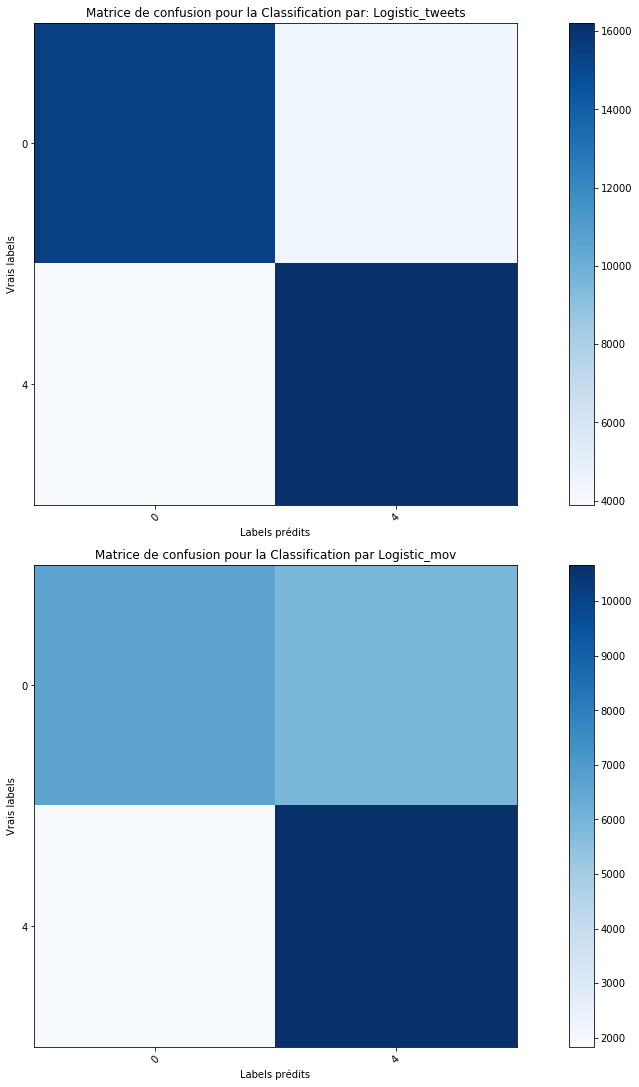

In [222]:
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(15,15))
plt.subplot(2,1,1)
plt.title('Matrice de confusion pour la Classification par: Logistic_tweets')
cm_model = confusion_matrix(y_test,prediction['Logistic_tweets'])
plot_confusion_matrix(cm_model)
plt.subplot(2,1,2)
cm_model1 = confusion_matrix(y_mov, prediction['Logistic_mov'])
plt.title('Matrice de confusion pour la Classification par Logistic_mov')
plot_confusion_matrix(cm_model1)

**Commentaire:** _La matrice de confusion colorée confirme les résulats mitigés obtenus précédemment._

## 2. Courbes de ROC

In [223]:
prediction

{'Logistic_tweets': array([0, 0, 4, ..., 0, 0, 4]),
 'Naif bayésien BernoulliNB_tweets': array([0, 0, 4, ..., 0, 0, 4]),
 'Naif bayésien MultinomialNB_tweets': array([0, 0, 4, ..., 0, 0, 4]),
 'KNeighbors_tweets': array([0, 0, 0, ..., 0, 0, 4]),
 'Decision Tree_tweets': array([0, 0, 0, ..., 0, 0, 4]),
 'Random Forest_tweets': array([0, 0, 4, ..., 0, 0, 0]),
 'XGBoost_tweets': array([4, 0, 0, ..., 0, 0, 4]),
 'GradientBoosting_tweets': array([4, 0, 0, ..., 0, 0, 4]),
 'AdaBoost_tweets': array([0, 0, 4, ..., 0, 0, 4]),
 'Logistic_mov': array([4, 0, 0, ..., 0, 0, 0]),
 'Naif bayésien BernoulliNB_mov': array([4, 0, 0, ..., 0, 0, 0]),
 'Naif bayésien MultinomialNB_mov': array([4, 4, 0, ..., 4, 4, 0]),
 'KNeighbors_mov': array([4, 0, 4, ..., 4, 4, 0]),
 'Decision Tree_mov': array([4, 0, 0, ..., 0, 0, 4]),
 'Random Forest_mov': array([4, 0, 0, ..., 0, 0, 0]),
 'XGBoost_mov': array([4, 0, 4, ..., 0, 4, 0]),
 'GradientBoosting_mov': array([4, 0, 4, ..., 0, 0, 0]),
 'AdaBoost_mov': array([4, 0, 

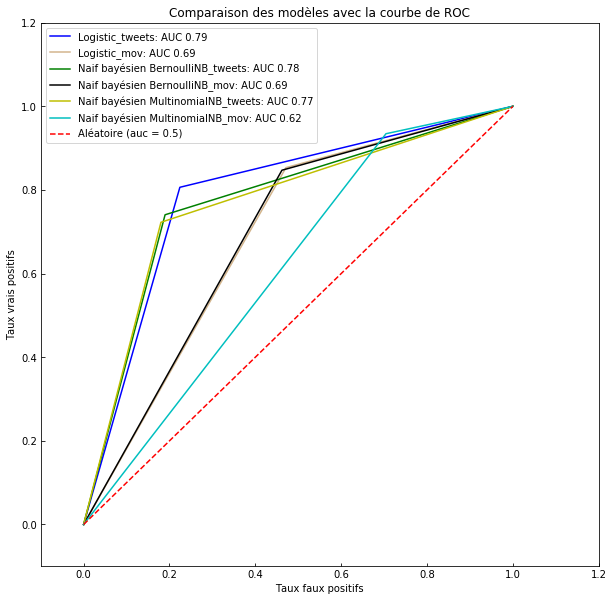

In [224]:
from sklearn.metrics import roc_curve,auc
cmp = 0
colors = ['b', 'g', 'y', 'tan', 'k','c','fuchsia','grey','orange','purple']
selected_models_name = ['Logistic', 'Naif bayésien BernoulliNB', 'Naif bayésien MultinomialNB']
plt.figure(figsize=(10,10))
for i in range(len(selected_models_name)):

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, prediction[selected_models_name[i]+'_tweets'],pos_label=4)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[i], label='%s: AUC %0.2f'% (selected_models_name[i]+'_tweets',roc_auc))

    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_mov, prediction[selected_models_name[i]+'_mov'],pos_label=4)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate, colors[i+3], label='%s: AUC %0.2f'% (selected_models_name[i]+'_mov',roc_auc))

plt.title('Comparaison des modèles avec la courbe de ROC')
plt.plot([0, 1], [0, 1], color='r',linestyle='--',label='Aléatoire (auc = 0.5)')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('Taux vrais positifs')
plt.xlabel('Taux faux positifs')
plt.legend(loc='best')
plt.tick_params(direction='in')
plt.show()

**Commentaire:** _De même, les courbes de ROC donnent un apreçu graphique des résultats précédemment obtenus avec des aires sous la courbes d'environ 0.7 sur le jeu de données des Movie Reviews. 
Bien que ces résultats sont inférieurs à ceux obtenus avec le jeu de données des tweets, ils sont néanmoins assez satisfaisants en général._